In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']
print(np.shape(X), np.shape(Y))

(1797, 64) (1797,)


In [3]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

In [4]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(3), 
                                           max_iter=200)

In [6]:
mlp.fit(X_train, Y_train)

/Users/forero/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=3, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [7]:
print('Loss', mlp.loss_)
print('F1', sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro'))

Loss 1.47018484967549
F1 0.47382462897254385


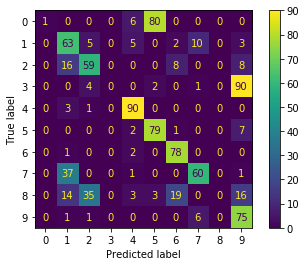

In [8]:
sklearn.metrics.plot_confusion_matrix(mlp, X_test, Y_test)

In [9]:
print(np.shape(mlp.coefs_))
for i in range(len(mlp.coefs_)):
    print(np.shape(mlp.coefs_[i]))

(2,)
(64, 3)
(3, 10)


In [10]:
mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(3,11,5), 
                                           max_iter=10000)

In [11]:
mlp.fit(X_train, Y_train)
print('Loss', mlp.loss_)
print('F1', sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro'))

Loss 0.881871115963298
F1 0.3618711155926947


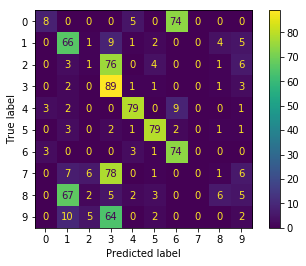

In [12]:
sklearn.metrics.plot_confusion_matrix(mlp, X_test, Y_test)

In [13]:
print(np.shape(mlp.coefs_))
for i in range(len(mlp.coefs_)):
    print(np.shape(mlp.coefs_[i]))

(4,)
(64, 3)
(3, 11)
(11, 5)
(5, 10)


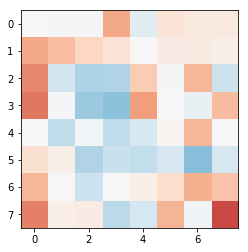

In [14]:
scale = np.max(mlp.coefs_[0])
plt.imshow(mlp.coefs_[0][:,0].reshape(8,8),cmap=plt.cm.RdBu, 
                   vmin=-scale, vmax=scale)

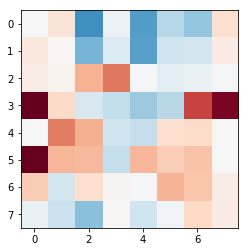

In [15]:
scale = np.max(mlp.coefs_[0])
plt.imshow(mlp.coefs_[0][:,1].reshape(8,8), cmap=plt.cm.RdBu, 
                   vmin=-scale, vmax=scale)

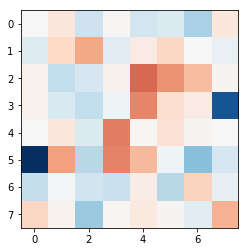

In [16]:
scale = np.max(mlp.coefs_[0])
plt.imshow(mlp.coefs_[0][:,2].reshape(8,8),cmap=plt.cm.RdBu, 
                   vmin=-scale, vmax=scale)

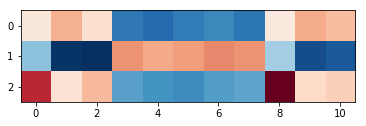

In [17]:
plt.imshow(mlp.coefs_[1],cmap=plt.cm.RdBu)

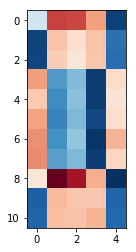

In [18]:
plt.imshow(mlp.coefs_[2],cmap=plt.cm.RdBu)

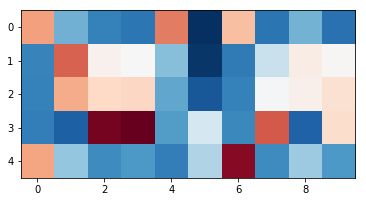

In [19]:
plt.imshow(mlp.coefs_[3],cmap=plt.cm.RdBu)